In [2]:
import requests
import json
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv("normalised_data.csv", index_col = "listing_id",  encoding='utf-8')
cleaned_data = pd.read_csv("cleaned_data.csv", index_col = "listing_id",  encoding='utf-8')


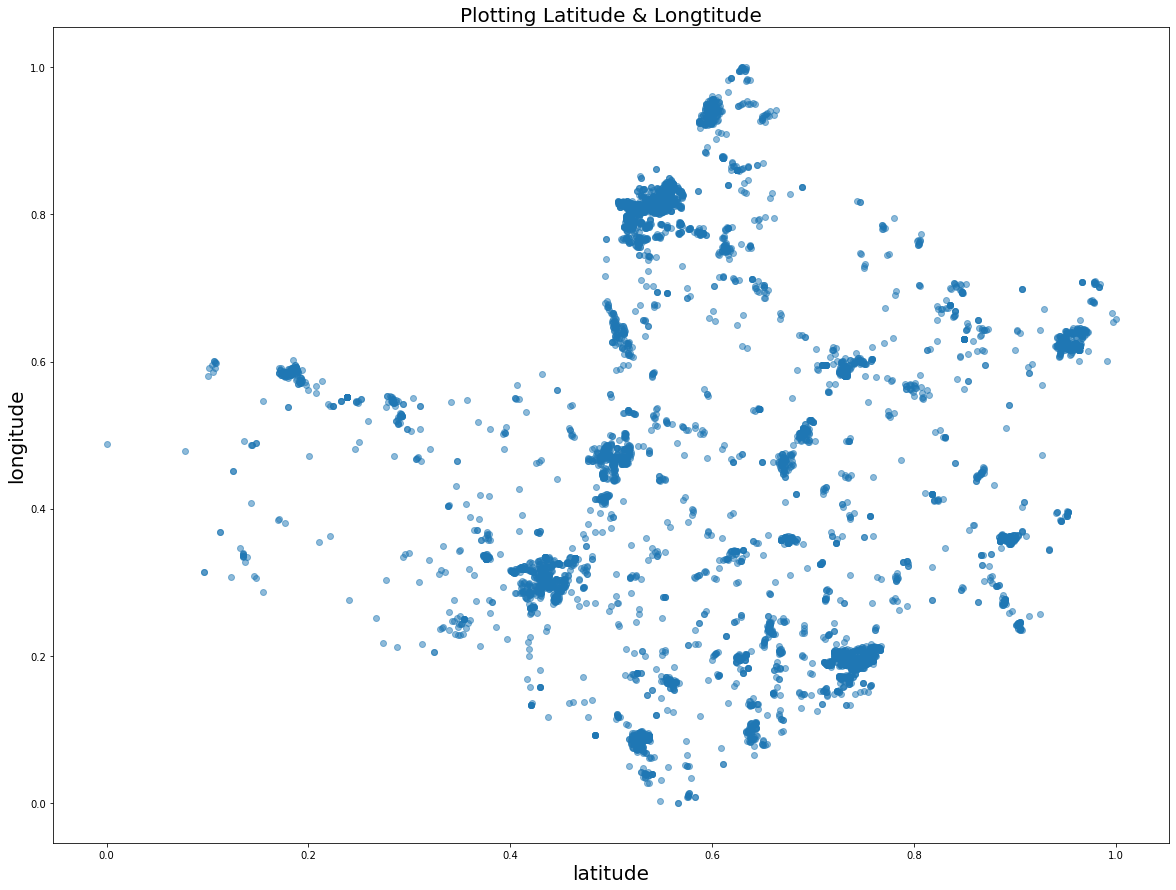

In [5]:
x = data["longitude"]
y = data["latitude"]

plt.scatter(x, y, alpha=0.5)
plt.title('Plotting Latitude & Longtitude', fontsize = 20)
plt.xlabel('latitude', fontsize = 20)
plt.ylabel('longitude', fontsize = 20)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()

In [6]:
cor_cor = data.corr()

cor_cor

,num_recepts,latitude,num_floors,new_home,price,num_bedrooms,longitude,num_bathrooms,Barn conversion,Block of flats,...,Terraced house,Town house,Villa,Bath & N E Somerset,Bristol,Devon,Dorset,North Somerset,Somerset,Wiltshire
num_recepts,1.000000,-0.100942,0.099386,-0.004166,0.445902,0.459262,0.086922,0.611075,-0.001250,-0.018931,...,-0.030732,-0.021904,-0.003737,-0.021185,-0.003990,0.006508,0.006371,-0.102695,0.102544,-0.005281
latitude,-0.100942,1.000000,-0.036829,-0.046928,0.045561,-0.007067,-0.045025,-0.106357,-0.041295,0.018238,...,-0.083850,-0.007663,-0.001891,0.100749,0.242963,-0.032677,-0.034407,0.720713,-0.781444,0.006526
num_floors,0.099386,-0.036829,1.000000,0.451907,0.017577,0.040060,0.052507,-0.009114,0.020755,-0.002915,...,-0.004975,0.007758,-0.005832,0.006499,0.060291,0.050852,-0.014609,-0.092880,0.062651,-0.002915
new_home,-0.004166,-0.046928,0.451907,1.000000,0.038425,0.023463,0.035769,0.014627,0.018943,-0.004041,...,0.001983,-0.010448,0.017238,0.067274,0.038768,-0.009040,0.060941,-0.124877,0.074045,-0.004041
price,0.445902,0.045561,0.017577,0.038425,1.000000,0.611649,0.063128,0.408504,0.081060,-0.008630,...,-0.157867,-0.011956,0.005980,0.119543,0.128900,0.041228,0.034811,-0.066976,-0.028024,0.034847
num_bedrooms,0.459262,-0.007067,0.040060,0.023463,0.611649,1.000000,0.041100,0.444065,0.016757,0.000449,...,-0.060804,0.036605,-0.016913,0.028596,0.041022,0.006316,0.023667,-0.061133,0.030028,0.000449
longitude,0.086922,-0.045025,0.052507,0.035769,0.063128,0.041100,1.000000,0.068044,-0.000288,-0.006842,...,0.021129,0.018372,0.045017,0.197086,0.057475,-0.057435,0.124884,-0.154886,0.048414,0.030882
num_bathrooms,0.611075,-0.106357,-0.009114,0.014627,0.408504,0.444065,0.068044,1.000000,0.010803,-0.018846,...,-0.074601,0.016801,-0.006915,0.071449,-0.031696,-0.000846,0.028953,-0.076992,0.056434,0.011933
Barn conversion,-0.001250,-0.041295,0.020755,0.018943,0.081060,0.016757,-0.000288,0.010803,1.000000,-0.001118,...,-0.031780,-0.008482,-0.002236,-0.011223,0.032279,0.073379,-0.005600,-0.037720,0.023257,-0.001118
Block of flats,-0.018931,0.018238,-0.002915,-0.004041,-0.008630,0.000449,-0.006842,-0.018846,-0.001118,1.000000,...,-0.005355,-0.001429,-0.000377,-0.001891,-0.002173,-0.000421,-0.000944,0.025790,-0.022587,-0.000188


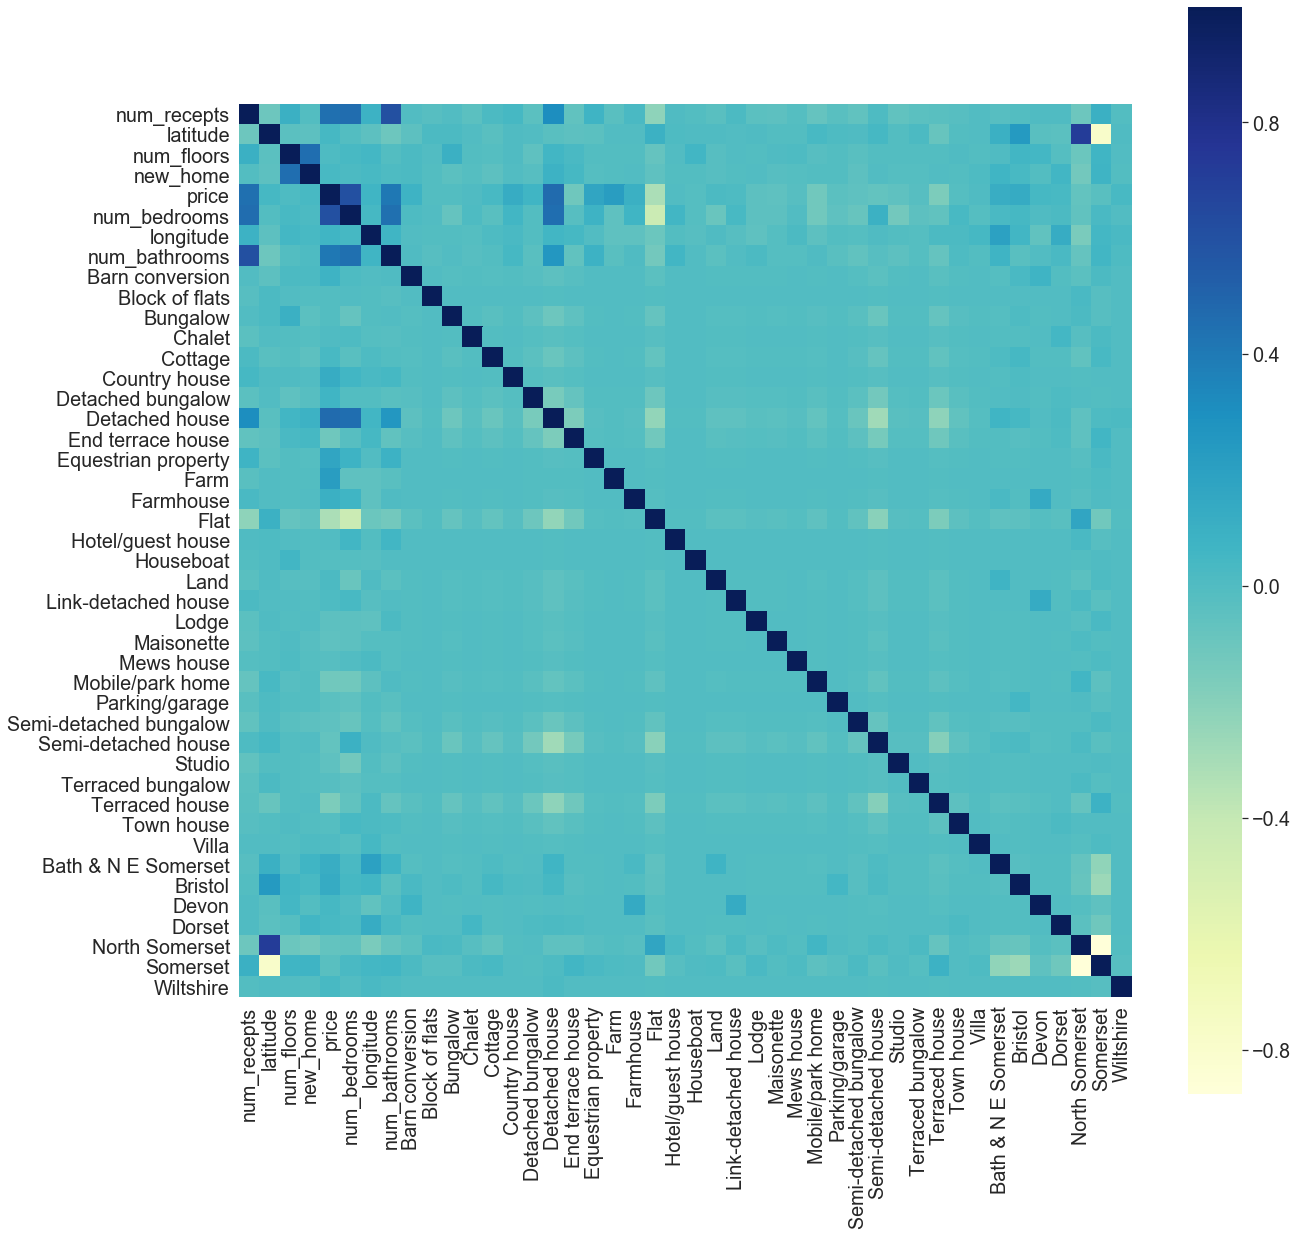

In [10]:
sns.set(font_scale=1.8)
sns.heatmap(cor_cor, square=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()


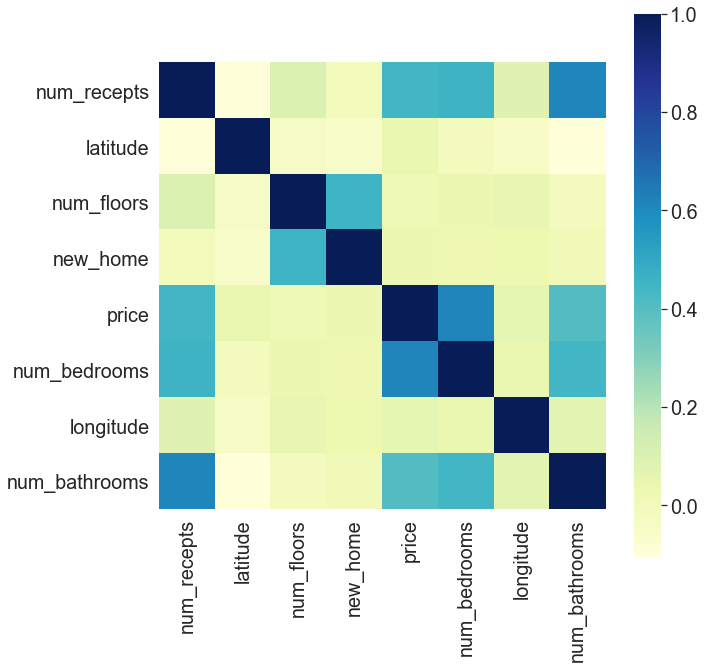

In [12]:
zoomed_cor_cor = cor_cor.loc["num_recepts":"num_bathrooms", "num_recepts":"num_bathrooms"]

sns.heatmap(zoomed_cor_cor, square=True, cmap="YlGnBu")
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [13]:
cor_cor.loc["num_recepts":"num_bathrooms","num_recepts":"num_bathrooms"]

,num_recepts,latitude,num_floors,new_home,price,num_bedrooms,longitude,num_bathrooms
num_recepts,1.000000,-0.100942,0.099386,-0.004166,0.445902,0.459262,0.086922,0.611075
latitude,-0.100942,1.000000,-0.036829,-0.046928,0.045561,-0.007067,-0.045025,-0.106357
num_floors,0.099386,-0.036829,1.000000,0.451907,0.017577,0.040060,0.052507,-0.009114
new_home,-0.004166,-0.046928,0.451907,1.000000,0.038425,0.023463,0.035769,0.014627
price,0.445902,0.045561,0.017577,0.038425,1.000000,0.611649,0.063128,0.408504
num_bedrooms,0.459262,-0.007067,0.040060,0.023463,0.611649,1.000000,0.041100,0.444065
longitude,0.086922,-0.045025,0.052507,0.035769,0.063128,0.041100,1.000000,0.068044
num_bathrooms,0.611075,-0.106357,-0.009114,0.014627,0.408504,0.444065,0.068044,1.000000


In [14]:
# cleaned_data.drop(cleaned_data[cleaned_data.num_bathrooms == 0].index, inplace=True)
num_bathrooms = sorted(cleaned_data["num_bathrooms"].unique().tolist())

price_mean = []
for i in num_bathrooms:
    price_mean.append(cleaned_data[cleaned_data["num_bathrooms"] == i][["price"]].mean().values[0])
price_mean

[276605.47033898305,
 220078.9488029466,
 348174.34973097616,
 526126.2734082397,
 736117.6271186441,
 742178.125,
 645990.0,
 890000.0,
 995000.0,
 685000.0,
 495000.0]

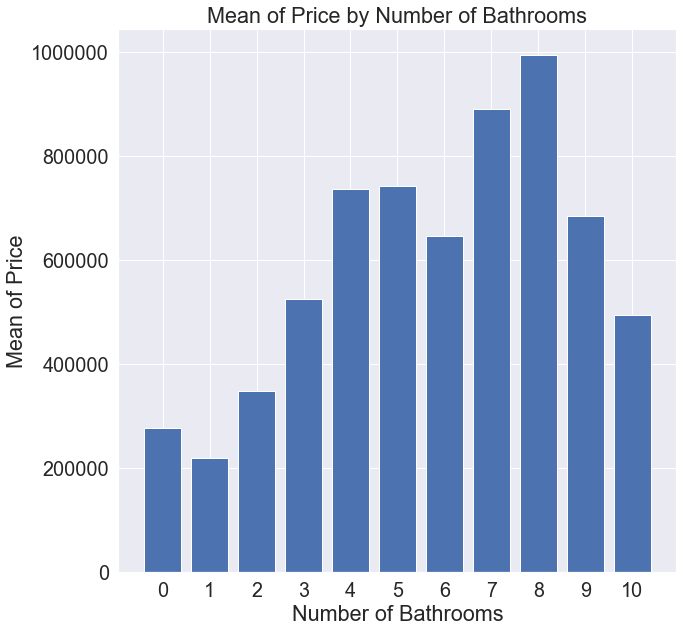

In [16]:
index_bathrooms = np.arange(len(num_bathrooms))
plt.bar(index_bathrooms, price_mean)
plt.xlabel("Number of Bathrooms")
plt.xticks(index_bathrooms, num_bathrooms)
plt.ylabel("Mean of Price")
plt.title("Mean of Price by Number of Bathrooms")
# plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

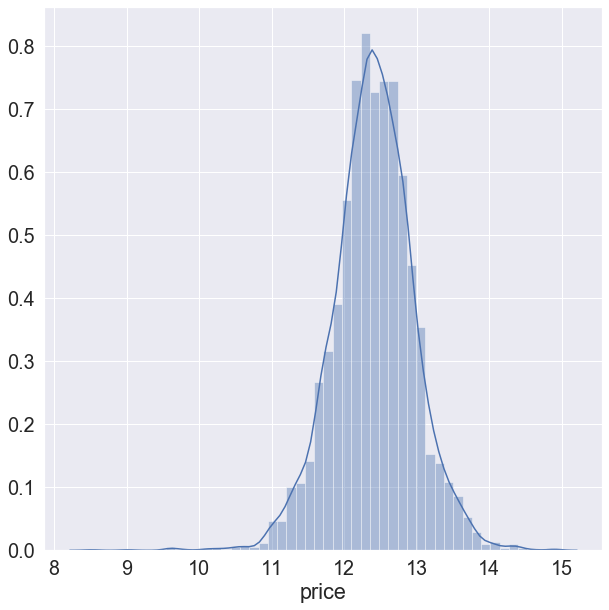

In [18]:
# x_index = list(data.index.values)
# y_price = data["price"]


sns.distplot(np.log(cleaned_data["price"]))
plt.show()

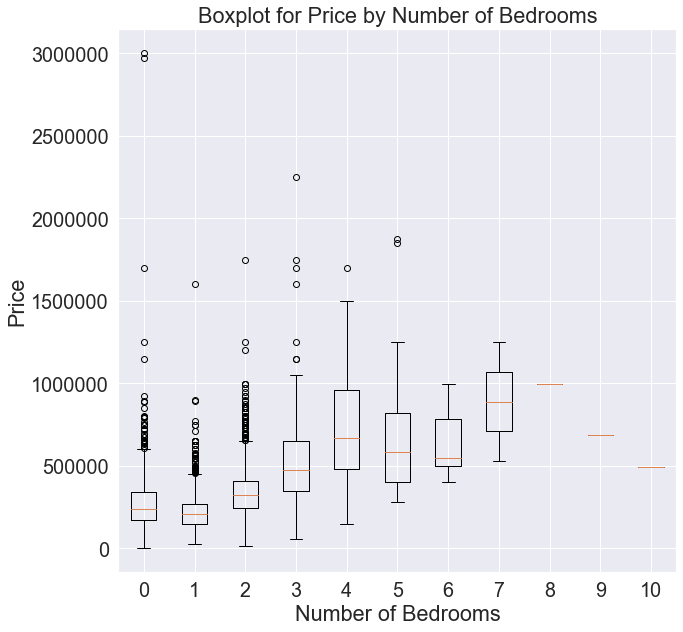

In [20]:
price = []
for i in num_bathrooms:
    price.append(cleaned_data[cleaned_data["num_bathrooms"] == i]["price"].values.tolist())
price

plt.boxplot(price, vert = True, labels = num_bathrooms)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Boxplot for Price by Number of Bedrooms")
plt.show()

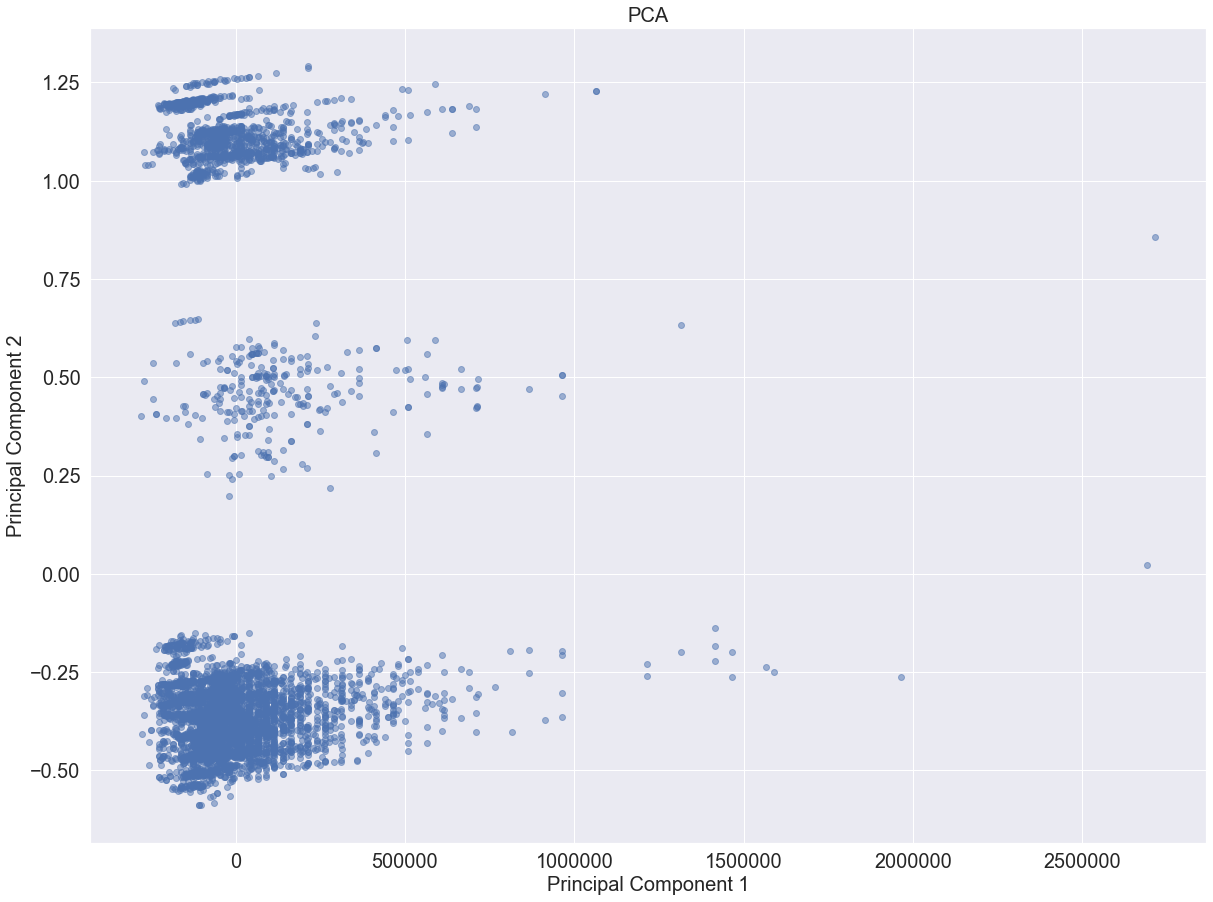

In [22]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
PC_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2'])
PC_df.index += 1
# PC_df
plt.scatter(PC_df["pc_1"], PC_df["pc_2"], alpha=0.5)
plt.title('PCA', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 20)
plt.ylabel('Principal Component 2', fontsize = 20)
plt.rcParams['figure.figsize'] = [20, 15]
plt.show()